## Assignment
Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

Propertycrime=α+Population+Population2+Murder+Robbery

Propertycrime=α+Population+Population2+Murder+Robbery

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.feature_selection import RFE

In [25]:
crime = pd.read_excel('/Users/marenbeckman/Desktop/Data_Science/new_york_by_city_2013.xls')

In [27]:
crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [51]:
crime.shape

(351, 15)

In [53]:
crime.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_Squared,Murder
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000,3.480000e+02,351.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658,2.035547e+11,0.139601
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411,3.778876e+12,0.347067
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000,9.018117e+06,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000,5.232568e+07,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000,3.397536e+08,0.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000,7.049493e+13,1.000000


In [37]:
crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3',
       'Population_Squared'],
      dtype='object')

### Population

In [29]:
crime['Population'].describe()

count    3.480000e+02
mean     4.003763e+04
std      4.500374e+05
min      5.260000e+02
25%      3.003000e+03
50%      7.233500e+03
75%      1.842750e+04
max      8.396126e+06
Name: Population, dtype: float64

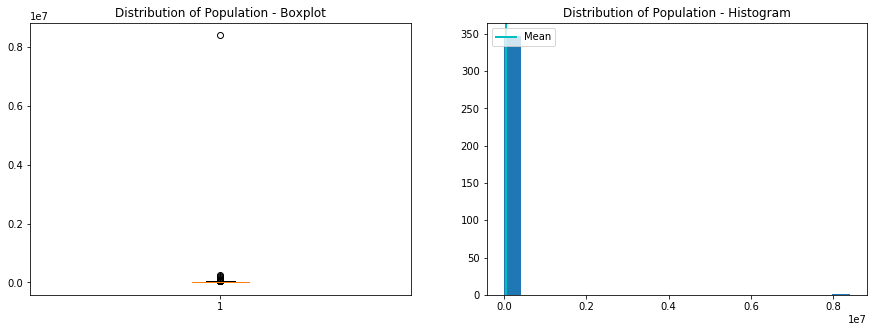

In [61]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Population'].dropna(how = 'any'))
plt.title('Distribution of Population - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Population'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Population'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Population - Histogram')

plt.show()

### Population Squared

In [30]:
crime['Population_Squared'] = crime['Population'] * crime['Population']

In [31]:
crime['Population_Squared'].describe()

count    3.480000e+02
mean     2.035547e+11
std      3.778876e+12
min      2.766760e+05
25%      9.018117e+06
50%      5.232568e+07
75%      3.397536e+08
max      7.049493e+13
Name: Population_Squared, dtype: float64

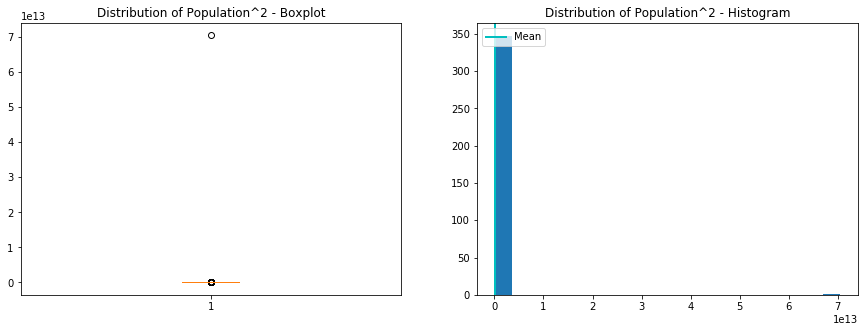

In [62]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Population_Squared'].dropna(how = 'any'))
plt.title('Distribution of Population^2 - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Population_Squared'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Population_Squared'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Population^2 - Histogram')

plt.show()

### Murder

In [39]:
crime['Murder and\nnonnegligent\nmanslaughter'].describe()

count    348.000000
mean       1.566092
std       18.303673
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      335.000000
Name: Murder and\nnonnegligent\nmanslaughter, dtype: float64

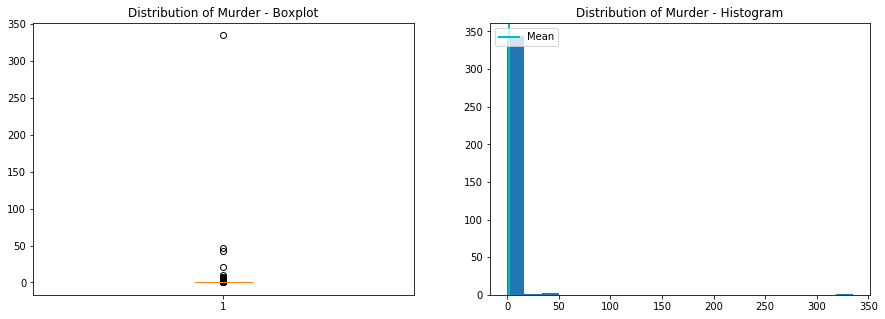

In [65]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Murder and\nnonnegligent\nmanslaughter'].dropna(how = 'any'))
plt.title('Distribution of Murder - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Murder and\nnonnegligent\nmanslaughter'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Murder and\nnonnegligent\nmanslaughter'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Murder - Histogram')

plt.show()

In [46]:
#transform continuous variable into categorical variable
crime['Murder'] = 0
crime.loc[crime['Murder and\nnonnegligent\nmanslaughter'] > 0, 'Murder'] = 1

(array([0, 1]), <a list of 2 Text xticklabel objects>)

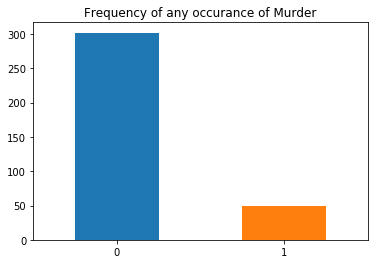

In [66]:
plt.title('Frequency of any occurance of Murder')
pd.value_counts(crime['Murder']).plot.bar()
plt.xticks(rotation = 0)

### Robbery

In [68]:
#reanem original Robbery column so name can be used later
crime.rename(columns={'Robbery': 'Robberies'}, inplace=True)

In [69]:
crime['Robberies'].describe()

count      348.000000
mean        72.902299
std       1031.032873
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max      19170.000000
Name: Robberies, dtype: float64

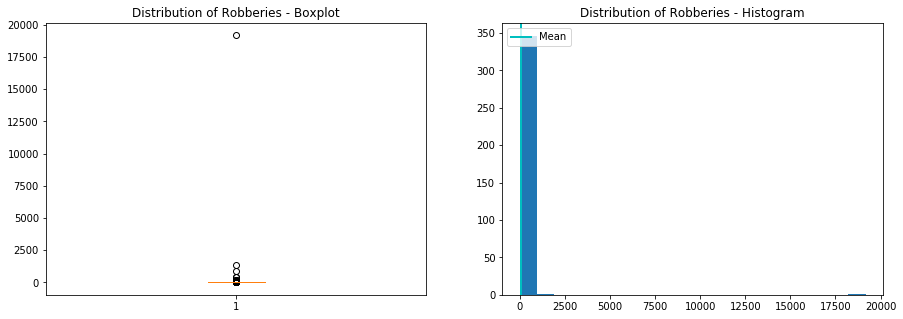

In [70]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Robberies'].dropna(how = 'any'))
plt.title('Distribution of Robberies - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Robberies'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Robberies'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Robberies - Histogram')

plt.show()

In [71]:
#transform continuous variable into categorical variable
crime['Robbery'] = 0
crime.loc[crime['Robberies'] > 0, 'Robbery'] = 1

(array([0, 1]), <a list of 2 Text xticklabel objects>)

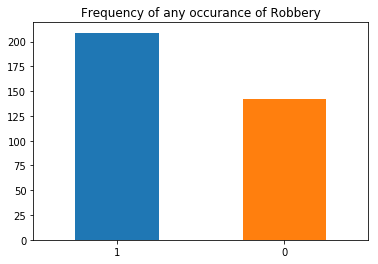

In [72]:
plt.title('Frequency of any occurance of Robbery')
pd.value_counts(crime['Robbery']).plot.bar()
plt.xticks(rotation = 0)